In [17]:
import numpy as np
from scipy import signal
from glob import glob
import matplotlib.pyplot as plt
from dataset import DataSet

# local jupyter notebook, not collab

1688
done 0
done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12
done 13
done 14
done 15
done 16
done 17
done 18
done 19
done 20
done 21
done 22
done 23
done 24
done 25
done 26
done 27
done 28
done 29
done 30
done 31
done 32
done 33
done 34
done 35
done 36
done 37
done 38
done 39
done 40
done 41
done 42
done 43
done 44
done 45
done 46
done 47
done 48
done 49
done 50
done 51
done 52
done 53
done 54
done 55
done 56
done 57
done 58
done 59
done 60
done 61
done 62
done 63
done 64
done 65
done 66
done 67
done 68
done 69
done 70
done 71
done 72
done 73
done 74
done 75
done 76
done 77
done 78
done 79
done 80
done 81
done 82
done 83
done 84
done 85
done 86
done 87
done 88
done 89
done 90
done 91
done 92
done 93
done 94
done 95
done 96
done 97
done 98
done 99
done 100
done 101
done 102
done 103
done 104
done 105
done 106
done 107
done 108
done 109
done 110
done 111
done 112
done 113
done 114
done 115
done 116
done 117
done 118
done 119
done 120
done 121
done 12

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/homebrew/lib/python3.9/site-packages/scipy/signal/signaltools.py:1531: UserWarning: kernel_size

done 568
done 569
done 570
done 571
done 572
done 573
done 574
done 575
done 576
done 577
done 578
done 579
done 580
done 581
done 582
done 583
done 584
done 585
done 586
done 587
done 588
done 589
done 590
done 591
done 592
done 593
done 594
done 595
done 596
done 597
done 598
done 599
done 600
done 601
done 602
done 603
done 604
done 605
done 606
done 607
done 608
done 609
done 610
done 611
done 612
done 613
done 614
done 615
done 616
done 617
done 618
done 619
done 620
done 621
done 622
done 623
done 624
done 625
done 626
done 627
done 628
done 629
done 630
done 631
done 632
done 633
done 634
done 635
done 636
done 637
done 638
done 639
done 640
done 641
done 642
done 643
done 644
done 645
done 646
done 647
done 648
done 649
done 650
done 651
done 652
done 653
done 654
done 655
done 656
done 657
done 658
done 659
done 660
done 661
done 662
done 663
done 664
done 665
done 666
done 667
done 668
done 669
done 670
done 671
done 672
done 673
done 674
done 675
done 676
done 677
done 678
d

IndexError: index 1 is out of bounds for axis 1 with size 1

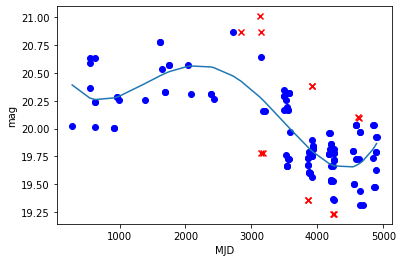

In [18]:
#--------------------------------------------------------------------------------------------------------
# PREPROCESSING, from Catalina data
#--------------------------------------------------------------------------------------------------------

# three point median filter

# clipping of all points that deviated significantly from a quintic polynomial fit to the data 

# clipping threshold was initially set to 0.25 mag and then iteratively increased (if necessary) until no more 
# than 10 percent of the points were rejected

# dataset, glob, np, scipy, matplotlib

lc_files = glob('/Users/mattlowery/Desktop/code/astro/hetvae/data/CAT/*/*')

Catalina = DataSet() \
            .add_files(lc_files) \
            .files_to_numpy() \
            .handle_dups()

print(len(Catalina.files))

for i, lc in enumerate(Catalina.dataset): 
    if len(lc) < 50:
        del Catalina.files[i]
        del Catalina.dataset[i]
        pass
    lc[:,1] = signal.medfilt(lc[:,1], kernel_size=3)
    quintic_fit = np.polyfit(lc[:,0], lc[:,1], deg=5)
    quintic_y = np.array([lc[:,0]**5, lc[:,0] ** 4, lc[:,0] ** 3, lc[:,0] ** 2 , lc[:,0], np.ones(len(lc))])
    quintic_y = np.matmul(quintic_y.T, quintic_fit)

    #print(np.std(quintic_y))
    
    dev = np.abs(lc[:,1] - quintic_y)


    # increase mag_threshold of outliers if more than 10 percent are removed
    percentage = 1.
    mag_threshold = 0.25
    while(True):
        outliers = np.where(dev >= mag_threshold)[0]
        percentage = len(outliers)/ len(lc) # none past 10 percent 
        #print(percentage)
        if percentage > .1:
            #print('need to increase outlier mag threshold')
            mag_threshold += 0.01
        else:
            break
    new_lc = np.delete(lc, outliers, axis=0)
    fname = Catalina.files[i].split("/")[-1]
    np.savetxt(f"/Users/mattlowery/Desktop/code/astro/hetvae/data/CAT/processed/{fname}", new_lc)
    print('done', i)
    
    if i == 100:
        plt.plot(lc[:,0], quintic_y)
        plt.scatter(lc[outliers,0], lc[outliers,1], c='r', marker='x')
        plt.scatter(new_lc[:,0], new_lc[:,1], c='b')
        plt.xlabel('MJD')
        plt.ylabel('mag')